In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import matplotlib.style as style
from xgboost import plot_tree

from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from IPython.display import Audio
sound_file = '/Users/rogerrabbit/Library/Application Support/Google/Chrome/Default/Extensions/lojgmehidjdhhbmpjfamhpkpodfcodef/34_0/audio/0f034826.mp3'

In [2]:
def FilterOne(d, x):
    d1 = d.isnull().sum() / x * 100
    d2 = pd.DataFrame(data=d1)
    d3 = d2.rename(columns={0: 'RatioEmpty'})
    d4 = d3.T
    d = d.append(d4, ignore_index=True)
    d5 = d.T
    d6 = d5.rename(columns={x: 'EmptyRatio'})
    d7 = d6.drop(d6[d6.EmptyRatio > 50].index)
    d8 = d7.T
    d9 = d8[:-1]
    return d9


def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return all_empty_cell


d_15 = pd.read_csv('2015.csv')
d_16 = pd.read_csv('2016.csv')

d_15_f1 = FilterOne(d_15, 3340)
d_16_f1 = FilterOne(d_16, 3376)

df1 = d_15_f1["Location"].str.split(":", n=10, expand=True)
for x in range(8):
    d_15_f1[x] = df1[x]

df1 = d_15_f1[1].str.split(",", n=2, expand=True)
df1_r = df1[0].str.replace("'", '')
d_15_f1['Latitude'] = df1_r

df2 = d_15_f1[2].str.split(",", n=2, expand=True)
df2_r = df2[0].str.replace("'", '')
d_15_f1['Longitude'] = df2_r

df3 = d_15_f1[4].str.split(",", n=2, expand=True)
df3_r = df3[0].str.replace('"', '')
d_15_f1['Address'] = df3_r

df4 = d_15_f1[5].str.split(',', n=1, expand=True)
df4_r = df4[0].str.replace('"', '')
d_15_f1['City'] = df4_r

df5 = d_15_f1[6].str.split(",", n=1, expand=True)
df5_r = df5[0].str.replace('"', '')
d_15_f1['State'] = df5_r

df6 = d_15_f1[7].str.split("}", n=1, expand=True)
df6_r = df6[0].str.replace('"', '')
d_15_f1['ZipCode'] = df6_r

d_15_f1.drop(1, inplace=True, axis=1)
d_15_f1.drop(2, inplace=True, axis=1)
d_15_f1.drop(3, inplace=True, axis=1)
d_15_f1.drop(4, inplace=True, axis=1)
d_15_f1.drop(5, inplace=True, axis=1)
d_15_f1.drop(6, inplace=True, axis=1)
d_15_f1.drop(7, inplace=True, axis=1)
d_15_f1.drop('Location', inplace=True, axis=1)

d1 = d_15_f1["OSEBuildingID"]
d2 = d_16_f1["OSEBuildingID"]
d11 = pd.DataFrame(d1)
d21 = pd.DataFrame(d2)
d_2015 = d11.merge(d21, on='OSEBuildingID', how='outer', suffixes=['', '_'], indicator=True)
d_2015_1 = d_2015.loc[d_2015['_merge'] != 'both']
d_2015_2 = d_2015_1.loc[d_2015['_merge'] != 'right_only']

d_2015_3 = pd.merge(d_15_f1, d_2015_2, on=["OSEBuildingID", "OSEBuildingID"])

data = d_2015_3.append(d_16_f1)
data01 = data.sort_values(by=['OSEBuildingID'], ascending=True)
data02 = data01.reset_index()
data02.drop('index', inplace=True, axis=1)
data02.drop('_merge', inplace=True, axis=1)
data02.drop(0, inplace=True, axis=1)
data02.replace(0, np.nan, inplace=True)
data03 = FilterOne(data02, 3432)

data03_ = data03["ListOfAllPropertyUseTypes"].str.split(",", n=1, expand=True)
data03['ListOfAllPropertyUseTypes'] = data03_[0]
data03.drop('ListOfAllPropertyUseTypes', inplace=True, axis=1)
data03.drop('LargestPropertyUseType', inplace=True, axis=1)

data03.drop('OSEBuildingID', inplace=True, axis=1)
data03.drop('DataYear', inplace=True, axis=1)
data03.drop('BuildingType', inplace=True, axis=1)
data03.drop('PropertyName', inplace=True, axis=1)
data03.drop('TaxParcelIdentificationNumber', inplace=True, axis=1)
data03.drop('Neighborhood', inplace=True, axis=1)
data03.drop('NumberofBuildings', inplace=True, axis=1)
data03.drop('City', inplace=True, axis=1)
data03.drop('Address', inplace=True, axis=1)
data03.drop('State', inplace=True, axis=1)
data03.drop('PrimaryPropertyType', inplace=True, axis=1)
data03.drop('GHGEmissionsIntensity', inplace=True, axis=1)
data03.drop('ComplianceStatus', inplace=True, axis=1)
data03.drop('CouncilDistrictCode', inplace=True, axis=1)
data_04 = data03.dropna()

import time
import matplotlib
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (15, 15)})
for i in tqdm(range(5)):
    time.sleep(1)


def FilterOne(d, x):
    d1 = d.isnull().sum() / x * 100
    d2 = pd.DataFrame(data=d1)
    d3 = d2.rename(columns={0: 'RatioEmpty'})
    d4 = d3.T
    d = d.append(d4, ignore_index=True)
    d5 = d.T
    d6 = d5.rename(columns={x: 'EmptyRatio'})
    d7 = d6.drop(d6[d6.EmptyRatio > 50].index)
    d8 = d7.T
    d9 = d8[:-1]
    return d9


def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return all_empty_cell


d_15 = pd.read_csv('2015.csv')
d_16 = pd.read_csv('2016.csv')

d_15_f1 = FilterOne(d_15, 3340)
d_16_f1 = FilterOne(d_16, 3376)

df1 = d_15_f1["Location"].str.split(":", n=10, expand=True)
for x in range(8):
    d_15_f1[x] = df1[x]

df1 = d_15_f1[1].str.split(",", n=2, expand=True)
df1_r = df1[0].str.replace("'", '')
d_15_f1['Latitude'] = df1_r

df2 = d_15_f1[2].str.split(",", n=2, expand=True)
df2_r = df2[0].str.replace("'", '')
d_15_f1['Longitude'] = df2_r

df3 = d_15_f1[4].str.split(",", n=2, expand=True)
df3_r = df3[0].str.replace('"', '')
d_15_f1['Address'] = df3_r

df4 = d_15_f1[5].str.split(',', n=1, expand=True)
df4_r = df4[0].str.replace('"', '')
d_15_f1['City'] = df4_r

df5 = d_15_f1[6].str.split(",", n=1, expand=True)
df5_r = df5[0].str.replace('"', '')
d_15_f1['State'] = df5_r

df6 = d_15_f1[7].str.split("}", n=1, expand=True)
df6_r = df6[0].str.replace('"', '')
d_15_f1['ZipCode'] = df6_r

d_15_f1.drop(1, inplace=True, axis=1)
d_15_f1.drop(2, inplace=True, axis=1)
d_15_f1.drop(3, inplace=True, axis=1)
d_15_f1.drop(4, inplace=True, axis=1)
d_15_f1.drop(5, inplace=True, axis=1)
d_15_f1.drop(6, inplace=True, axis=1)
d_15_f1.drop(7, inplace=True, axis=1)
d_15_f1.drop('Location', inplace=True, axis=1)

d1 = d_15_f1["OSEBuildingID"]
d2 = d_16_f1["OSEBuildingID"]
d11 = pd.DataFrame(d1)
d21 = pd.DataFrame(d2)
d_2015 = d11.merge(d21, on='OSEBuildingID', how='outer', suffixes=['', '_'], indicator=True)
d_2015_1 = d_2015.loc[d_2015['_merge'] != 'both']
d_2015_2 = d_2015_1.loc[d_2015['_merge'] != 'right_only']

d_2015_3 = pd.merge(d_15_f1, d_2015_2, on=["OSEBuildingID", "OSEBuildingID"])

data = d_2015_3.append(d_16_f1)
data01 = data.sort_values(by=['OSEBuildingID'], ascending=True)
data02 = data01.reset_index()
data02.drop('index', inplace=True, axis=1)
data02.drop('_merge', inplace=True, axis=1)
data02.drop(0, inplace=True, axis=1)
data02.replace(0, np.nan, inplace=True)
data03 = FilterOne(data02, 3432)
data03

100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,NaturalGas(kBtu),ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1,...,1.27645e+06,Compliant,47.6122,-122.338,405 Olive way,Seattle,WA,98101,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1,...,5.14508e+06,Compliant,47.6132,-122.334,724 Pine street,Seattle,WA,98101,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,7,DOWNTOWN,1969,1,...,1.4938e+06,Compliant,47.6139,-122.338,1900 5th Avenue,Seattle,WA,98101,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,1926,1,...,1.81121e+06,Compliant,47.6141,-122.337,620 STEWART ST,Seattle,WA,98101,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,1980,1,...,8.804e+06,Compliant,47.6138,-122.34,401 LENORA ST,Seattle,WA,98121,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1,...,325475,Error - Correct Default Data,47.5672,-122.312,1600 S Dakota St,Seattle,WA,NaN,20.94,1.7
3428,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1,...,553730,Compliant,47.5962,-122.323,719 8th Ave S,Seattle,WA,NaN,32.17,2.01
3429,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1,...,3.97374e+06,Compliant,47.6364,-122.358,1920 1st Ave W,Seattle,WA,NaN,223.54,16.99
3430,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1,...,370601,Compliant,47.5283,-122.324,8319 8th Ave S,Seattle,WA,NaN,22.11,1.57


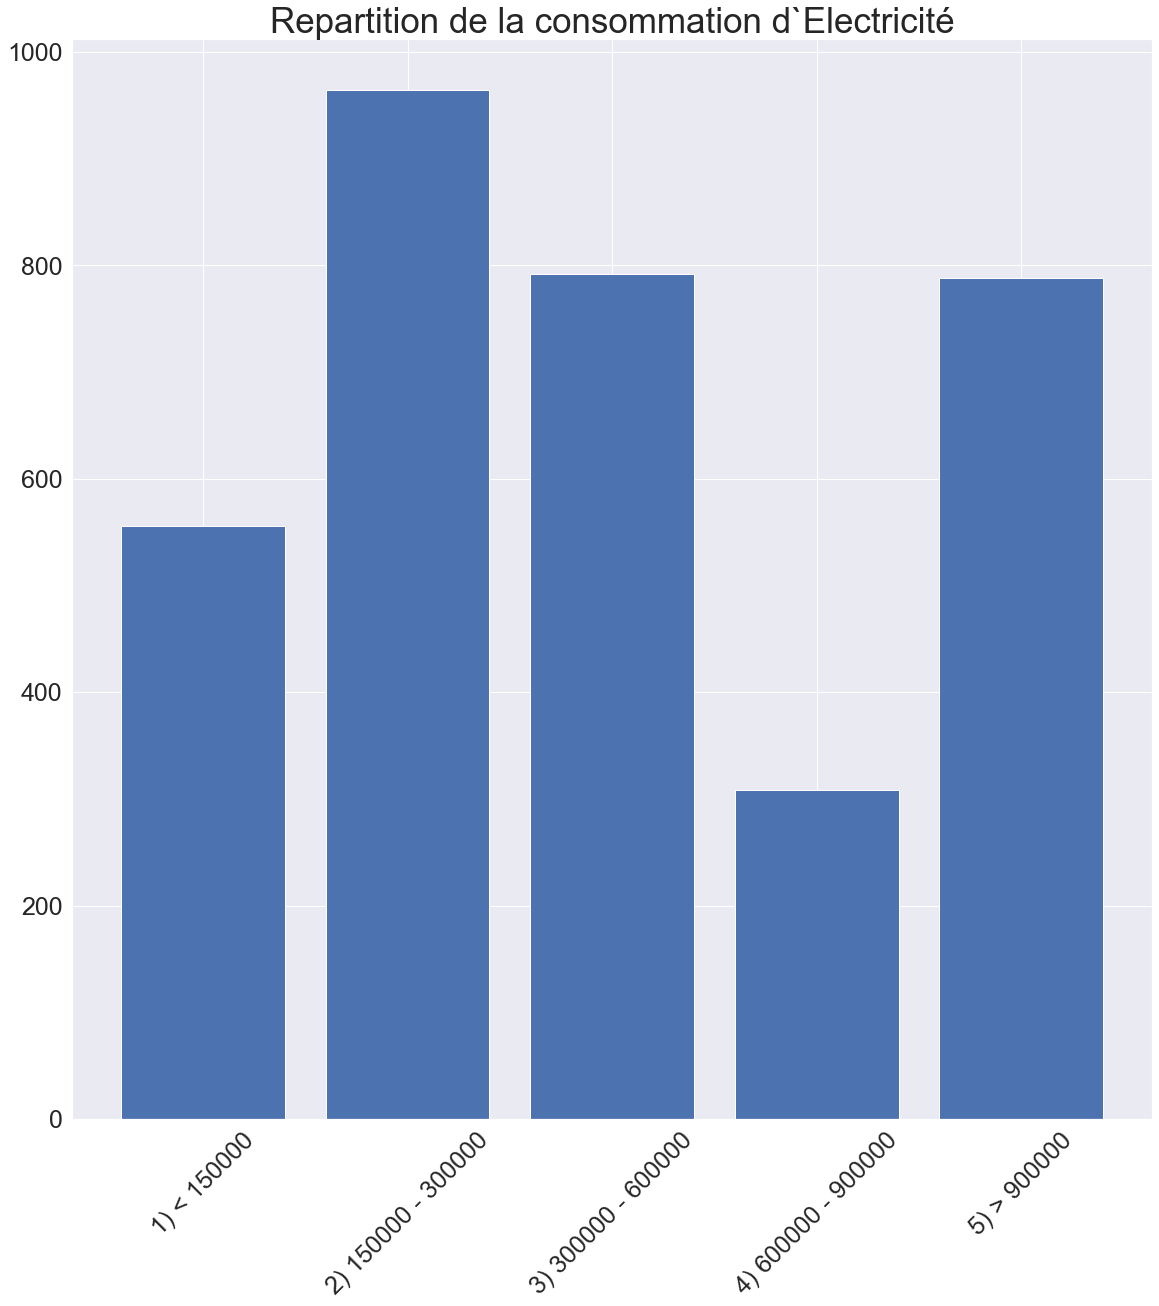

In [3]:
d_Ele = data03["Electricity(kWh)"]
d_Ele = pd.DataFrame(d_Ele)
d_Ele = d_Ele.sort_values(by=['Electricity(kWh)'], ascending=False)
d_Ele = d_Ele.dropna()


c_TGHGE = [
    (d_Ele["Electricity(kWh)"] <= 150000),
    (d_Ele["Electricity(kWh)"] >  150000)  & (d_Ele["Electricity(kWh)"] <= 300000 ),
    (d_Ele["Electricity(kWh)"] >  300000  )  & (d_Ele["Electricity(kWh)"] <= 600000),
    (d_Ele["Electricity(kWh)"] >  600000)  & (d_Ele["Electricity(kWh)"] <= 900000 ),
    (d_Ele["Electricity(kWh)"] >  900000) ]

v_TGHGE = ["1) < 150000","2) 150000 - 300000","3) 300000 - 600000","4) 600000 - 900000", "5) > 900000"]

d_Ele['count'] = np.select(c_TGHGE, v_TGHGE)

d_Ele = d_Ele["count"].value_counts()
d_Ele = pd.DataFrame(d_Ele) 
e_05 = pd.DataFrame(data=d_Ele)
e_05 = e_05.reset_index()
e_05 = e_05.sort_values(by=['index'], ascending=True)

e_06 = e_05["index"]
e_07 = e_05["count"]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(25)
    
ax.bar(e_06,e_07)
plt.xticks(rotation=45)
plt.title('Repartition de la consommation d`Electricité', fontsize=35)
plt.savefig('Gene_1.png')
plt.show()



TotalGHGEmissions    16870.98
dtype: float64
       TotalGHGEmissions     TotalGHG
count        3358.000000  3358.000000
mean          119.552114     0.452650
std           539.513531     3.168675
min             0.000000     0.000000
25%             9.000000     0.000000
50%            34.000000     0.000000
75%            94.000000     0.000000
max         16870.000000   100.000000


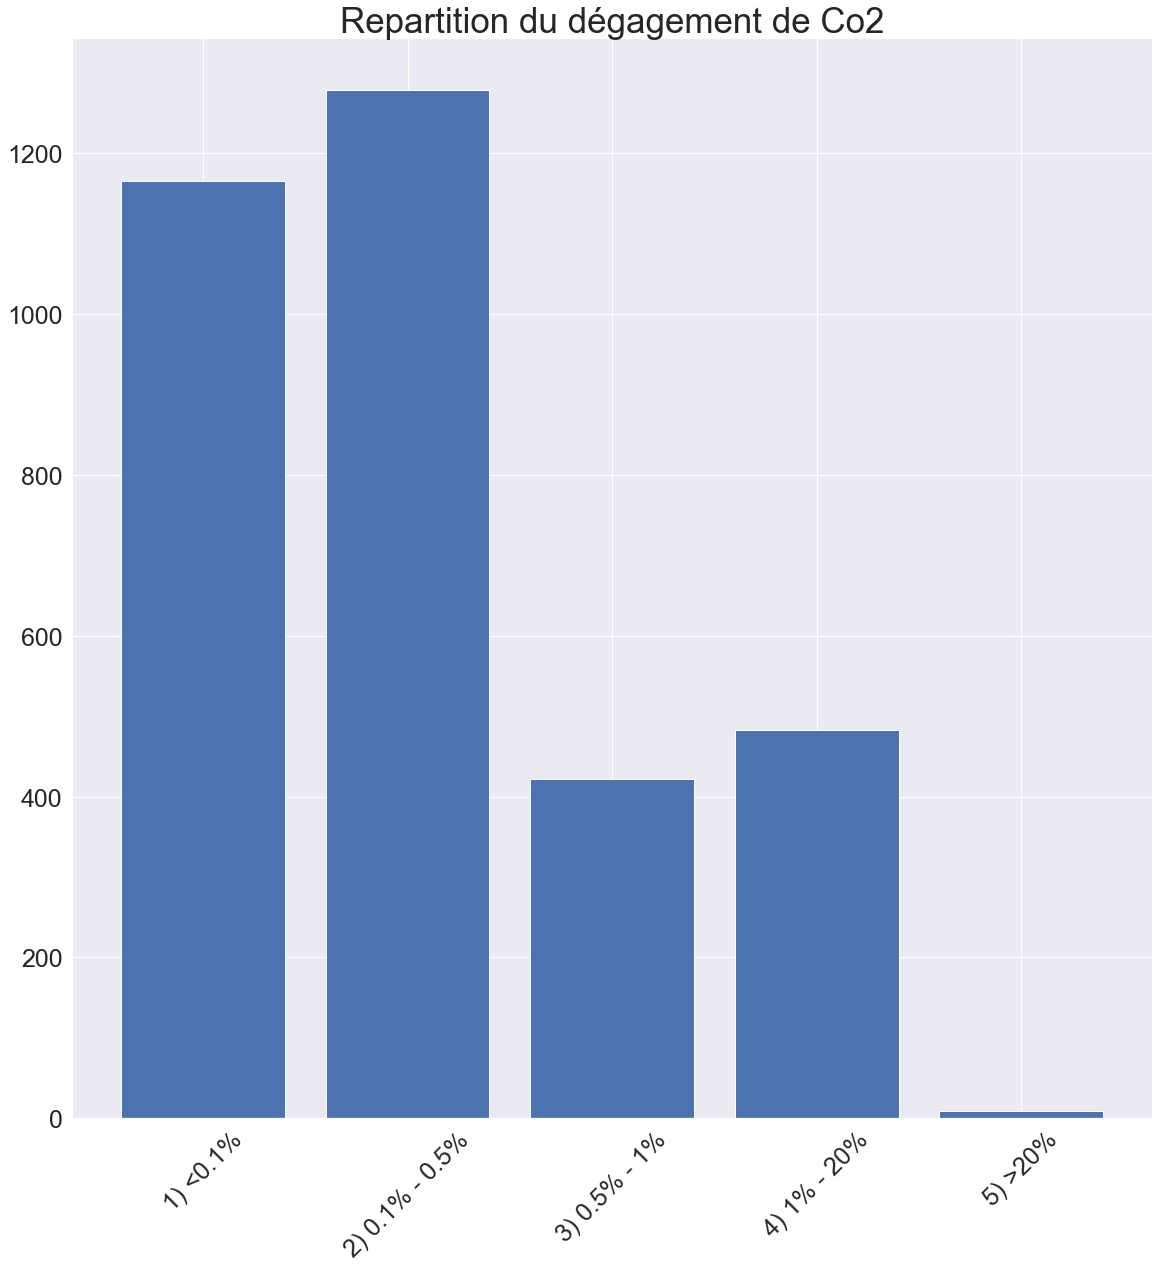

In [4]:
d_To = data03["TotalGHGEmissions"]
d_To = pd.DataFrame(d_To)
d_To = d_To.sort_values(by=['TotalGHGEmissions'], ascending=False)
d_To = d_To.dropna()
print(d_To.max())
d_To["TotalGHG"] = d_To["TotalGHGEmissions"]/16870.98*100
print(d_To.astype(int).describe())

c_TGHGE = [
    (d_To["TotalGHG"] <= 0.1),
    (d_To["TotalGHG"] >  0.1)  & (d_To["TotalGHG"] <= 0.5),
    (d_To["TotalGHG"] >  0.5)  & (d_To["TotalGHG"] <= 1),
    (d_To["TotalGHG"] >  1)  & (d_To["TotalGHG"] <= 20),
    (d_To["TotalGHG"] >  20)  ]


v_TGHGE = ["1) <0.1%", "2) 0.1% - 0.5%","3) 0.5% - 1%","4) 1% - 20%","5) >20%"]

d_To['count'] = np.select(c_TGHGE, v_TGHGE)

d_To = d_To["count"].value_counts()
d_To = pd.DataFrame(d_To) 
e_05 = pd.DataFrame(data=d_To)
e_05 = e_05.reset_index()
e_05 = e_05.sort_values(by=['index'], ascending=True)

e_06 = e_05["index"]
e_07 = e_05["count"]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(25)
    
ax.bar(e_06,e_07)
plt.xticks(rotation=45)
plt.title("Repartition du dégagement de Co2", fontsize=35)
plt.savefig('Gene_2.png')
plt.show()

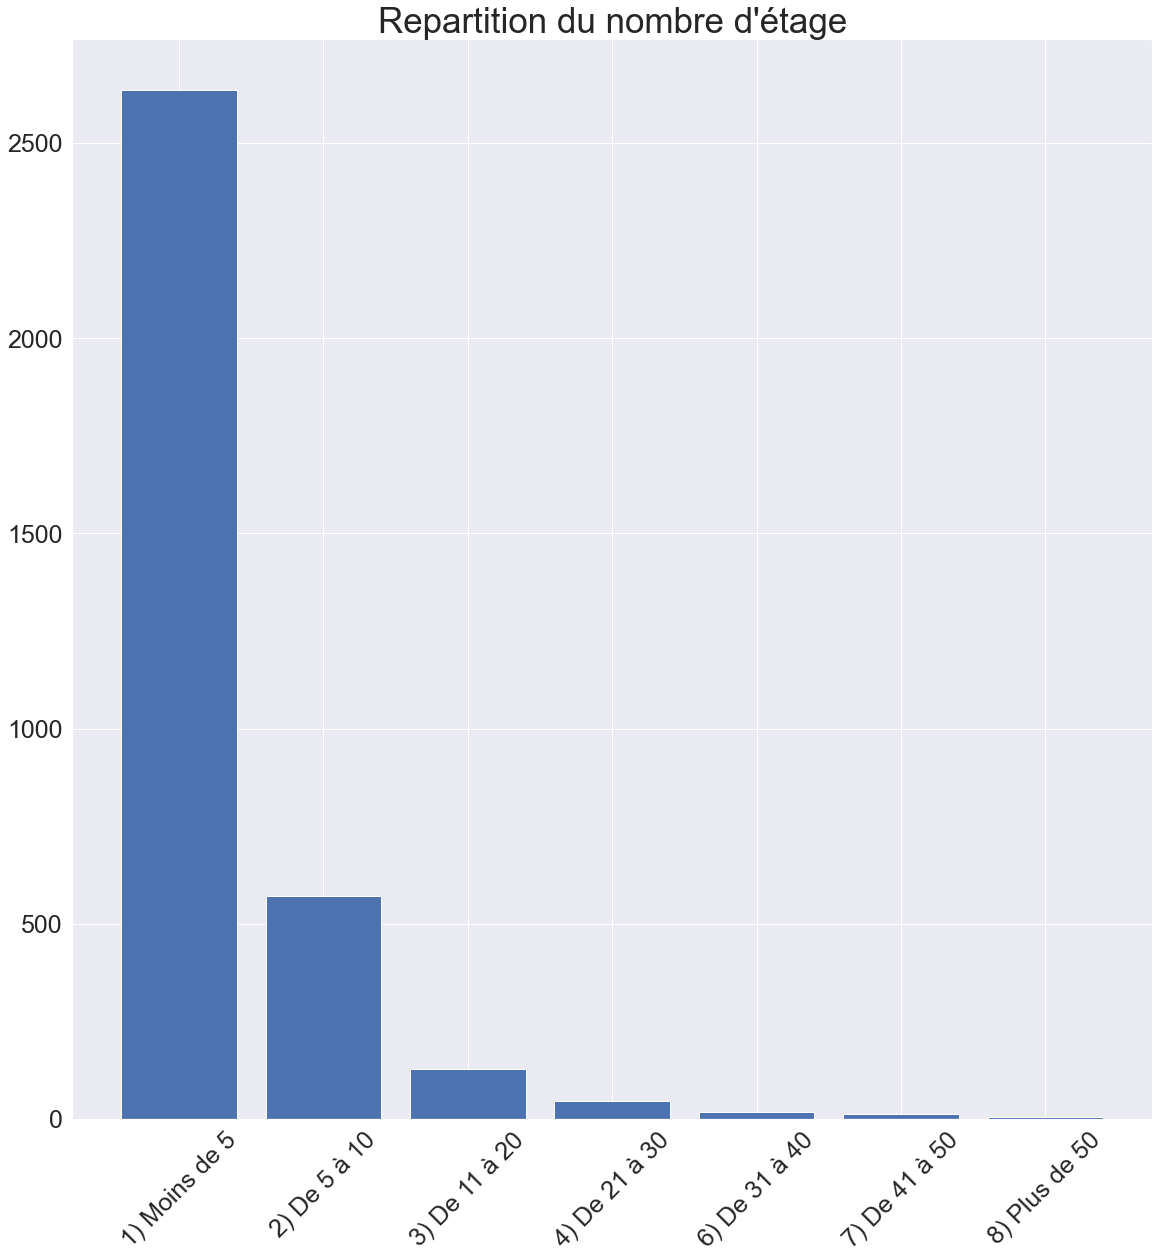

In [5]:
d6 = data03["NumberofFloors"]
d6 = pd.DataFrame(d6) 
d6 = d6.dropna()


c_TGHGE = [
    (d6["NumberofFloors"] <= 5),
    (d6["NumberofFloors"] >  5)  &  (d6['NumberofFloors'] <= 10 ),
    (d6["NumberofFloors"] >  10)  & (d6['NumberofFloors'] <= 20),
    (d6["NumberofFloors"] >  20)  & (d6['NumberofFloors'] <= 30 ),
    (d6["NumberofFloors"] >  30)  & (d6['NumberofFloors'] <= 40 ),
    (d6["NumberofFloors"] >  40)  & (d6['NumberofFloors'] <= 50 ),
    (d6["NumberofFloors"] >  50) ]

v_TGHGE = ["1) Moins de 5","2) De 5 à 10","3) De 11 à 20","4) De 21 à 30", "6) De 31 à 40", "7) De 41 à 50", "8) Plus de 50"]

d6['count'] = np.select(c_TGHGE, v_TGHGE)


d6 = d6["count"].value_counts()
d6 = pd.DataFrame(d6) 
e_05 = pd.DataFrame(data=d6)
e_05 = e_05.reset_index()
e_05 = e_05.sort_values(by=['index'], ascending=True)

e_05

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(25)
ax.bar(e_05['index'],e_05['count'])
plt.xticks(rotation=45)
plt.title("Repartition du nombre d'étage", fontsize=35)
plt.savefig('Gene_3.png')
plt.show()








Text(0.5, 1.0, "Repartition de l'Energy Star Score")

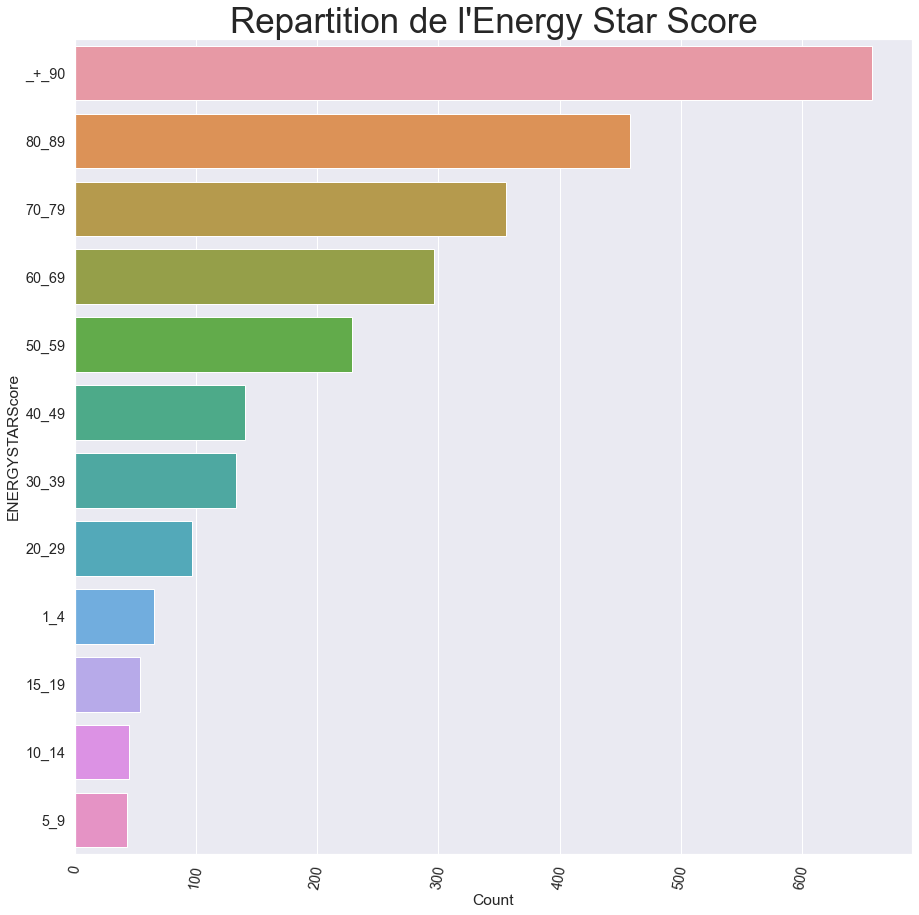

In [6]:
item_c = data03["ENERGYSTARScore"].value_counts()
item_c_df = pd.DataFrame(item_c)
d6 = item_c_df.rename(columns={"ENERGYSTARScore": 'Count'})
d6["ENERGYSTARScore"] = d6.index
d6["ENERGYSTARScore"].replace(1.0,"1_4", inplace=True)
d6["ENERGYSTARScore"].replace(1.0,"1_4", inplace=True)
d6["ENERGYSTARScore"].replace(2.0,"1_4", inplace=True)
d6["ENERGYSTARScore"].replace(3.0,"1_4", inplace=True)
d6["ENERGYSTARScore"].replace(4.0,"1_4", inplace=True)
d6["ENERGYSTARScore"].replace(5.0,"5_9", inplace=True)
d6["ENERGYSTARScore"].replace(6.0,"5_9", inplace=True)
d6["ENERGYSTARScore"].replace(7.0,"5_9", inplace=True)
d6["ENERGYSTARScore"].replace(8.0,"5_9", inplace=True)
d6["ENERGYSTARScore"].replace(9.0,"5_9", inplace=True)
d6["ENERGYSTARScore"].replace(10.0,"10_14", inplace=True)
d6["ENERGYSTARScore"].replace(11.0,"10_14", inplace=True)
d6["ENERGYSTARScore"].replace(12.0,"10_14", inplace=True)
d6["ENERGYSTARScore"].replace(13.0,"10_14", inplace=True)
d6["ENERGYSTARScore"].replace(14.0,"10_14", inplace=True)
d6["ENERGYSTARScore"].replace(15.0,"15_19", inplace=True)
d6["ENERGYSTARScore"].replace(16.0,"15_19", inplace=True)
d6["ENERGYSTARScore"].replace(17.0,"15_19", inplace=True)
d6["ENERGYSTARScore"].replace(18.0,"15_19", inplace=True)
d6["ENERGYSTARScore"].replace(19.0,"15_19", inplace=True)
d6["ENERGYSTARScore"].replace(20.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(21.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(22.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(23.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(24.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(25.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(26.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(27.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(28.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(29.0,"20_29", inplace=True)
d6["ENERGYSTARScore"].replace(30.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(31.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(32.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(33.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(34.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(35.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(36.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(37.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(38.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(39.0,"30_39", inplace=True)
d6["ENERGYSTARScore"].replace(40.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(41.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(42.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(43.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(44.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(45.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(46.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(47.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(48.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(49.0,"40_49", inplace=True)
d6["ENERGYSTARScore"].replace(50.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(51.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(52.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(53.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(54.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(55.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(56.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(57.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(58.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(59.0,"50_59", inplace=True)
d6["ENERGYSTARScore"].replace(60.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(61.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(62.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(63.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(64.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(65.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(66.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(67.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(68.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(69.0,"60_69", inplace=True)
d6["ENERGYSTARScore"].replace(70.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(71.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(72.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(73.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(74.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(75.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(76.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(77.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(78.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(79.0,"70_79", inplace=True)
d6["ENERGYSTARScore"].replace(80.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(81.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(82.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(83.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(84.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(85.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(86.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(87.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(88.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(89.0,"80_89", inplace=True)
d6["ENERGYSTARScore"].replace(90.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(91.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(92.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(93.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(94.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(95.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(96.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(97.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(98.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(99.0,"_+_90", inplace=True)
d6["ENERGYSTARScore"].replace(100.0,"_+_90", inplace=True)


d6 = d6.groupby('ENERGYSTARScore').sum().reset_index()
d6 = d6.sort_values(by=['Count'], ascending=False)
d6

plt.figure(figsize=(15, 15))
sns.set(font_scale=1.3)
ax = sns.barplot(x='Count', y="ENERGYSTARScore", data=d6, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_4.png')
plt.title("Repartition de l'Energy Star Score", fontsize=35)




In [7]:
# A justifier 
data03.drop('ListOfAllPropertyUseTypes', inplace=True, axis=1)
data03.drop('LargestPropertyUseType', inplace=True, axis=1)
#data03

In [8]:
def variableCount(x):
    i_c = x.value_counts()
    item_c_df = pd.DataFrame(item_c)
    d6 = item_c_df.rename(columns={x: 'Count'})
    d6[x] = d6.index
    plt.figure(figsize=(13, 8))
    sns.set(font_scale=1.3)
    ax = sns.barplot(x='Count', y=y, data=d6, orient='h', saturation=0.7)
    plt.xticks(rotation=80)
    plt.title(" Schema 49.2 - Marque : Top 15", fontsize=15)
    return ax

Text(0.5, 1.0, "Repartition du nombre d'immeuble en fonction du quartier")

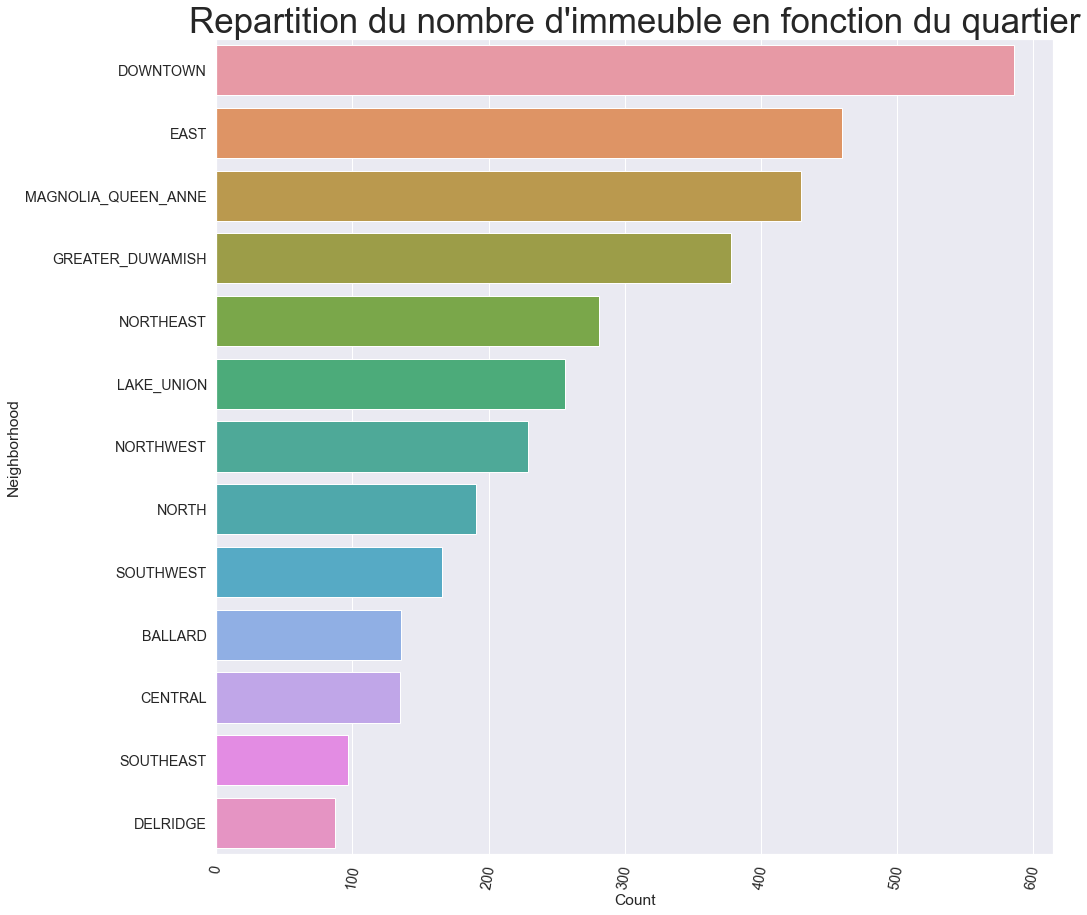

In [9]:

e_05 = data03["Neighborhood"]
e_05.replace("MAGNOLIA / QUEEN ANNE","MAGNOLIA_QUEEN_ANNE", inplace=True)
e_05.replace("LAKE UNION","LAKE_UNION", inplace=True)
e_05.replace("GREATER DUWAMISH","GREATER_DUWAMISH", inplace=True)
e_05.replace("Ballard","BALLARD", inplace=True)
e_05.replace("Central","CENTRAL", inplace=True)
e_05.replace("Delridge","DELRIDGE", inplace=True)
e_05.replace("DELRIDGE NEIGHBORHOODS","DELRIDGE", inplace=True)
e_05.replace("Northwest","NORTHWEST", inplace=True)
e_05.replace("North","NORTH", inplace=True)

e_05 = pd.DataFrame(data=e_05)
e_05 = e_05.reset_index()
e_05 = e_05.sort_values(by=['index'], ascending=True)
e_05
e_06 = e_05["Neighborhood"]
e_06 = e_06.value_counts()
e_06 = pd.DataFrame(e_06)
e_06 = e_06.reset_index()
e_06 = e_06.rename(columns={"index": 'Neighborhood',"Neighborhood": 'Count'})
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.3)
ax = sns.barplot(x='Count', y="Neighborhood", data=e_06, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_5.png')
plt.title("Repartition du nombre d'immeuble en fonction du quartier", fontsize=35)

Text(0.5, 1.0, 'Repartition par type de batiment')

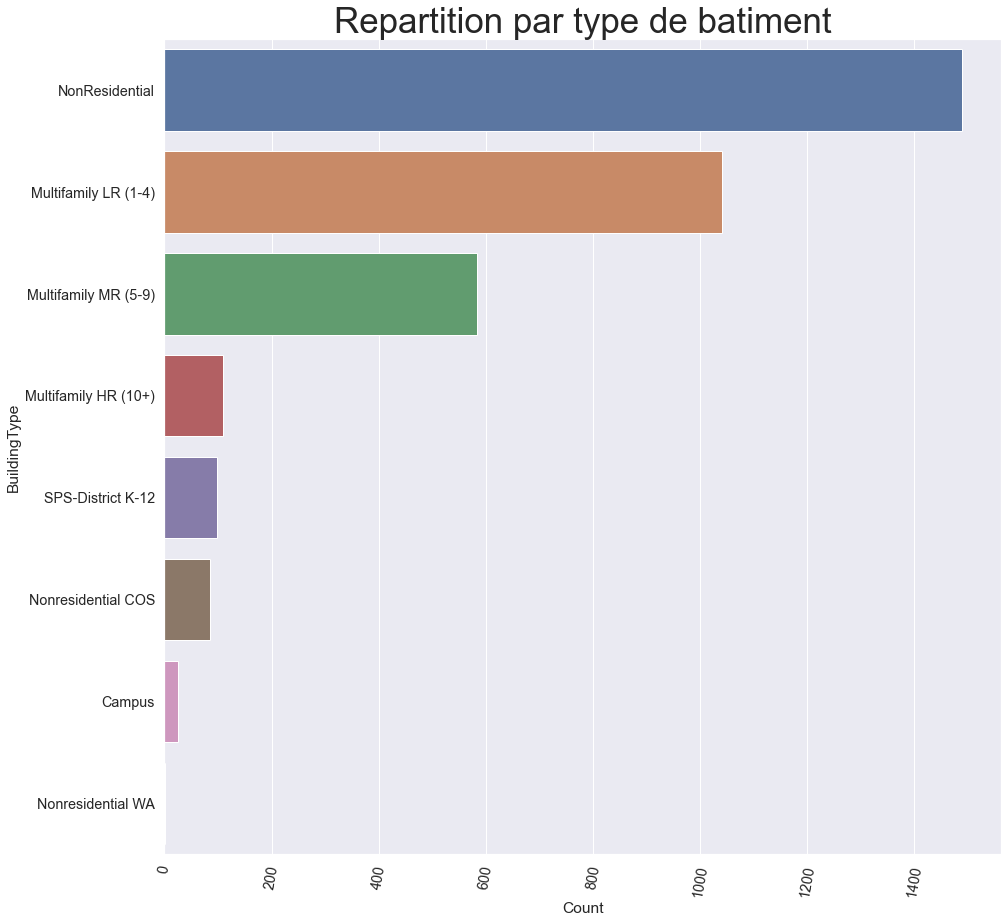

In [10]:


d6 = data03["BuildingType"]
d6 = pd.DataFrame(d6) 
d6 = d6.dropna()

e_05 = pd.DataFrame(data=d6)
e_05 = e_05.reset_index()
e_05 = e_05.sort_values(by=['index'], ascending=True)
e_06 = e_05["BuildingType"]
e_06 = e_06.value_counts()
e_06 = pd.DataFrame(e_06)
e_06 = e_06.reset_index()
e_06 = e_06.rename(columns={"index": 'BuildingType',"BuildingType": 'Count'})
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.3)
ax = sns.barplot(x='Count', y="BuildingType", data=e_06, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_6.png')
plt.title("Repartition par type de batiment", fontsize=35)

In [11]:
d1 = data03["PrimaryPropertyType"]
d1.replace('NonResidential', "NonResidential", inplace=True)
d1.replace('Nonresidential COS', "NonResidential", inplace=True)
d1.replace('Campus', 'Campus', inplace=True)
d1.replace('SPS-District K-12', 'School', inplace=True)
d1.replace('Multifamily LR (1-4)', 'Multifamily', inplace=True)
d1.replace('Multifamily MR (5-9)', 'Multifamily', inplace=True)
d1.replace('Multifamily HR (10+)', 'Multifamily', inplace=True)
d1.replace('Nonresidential WA', 'NonResidential', inplace=True)


d2 = data03["Neighborhood"]
d2.replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
d2.replace('Delridge', 'DELRIDGE', inplace=True)
d2.replace('Central', 'CENTRAL', inplace=True)
d2.replace('Ballard', "BALLARD", inplace=True)
d2.replace('North', "NORTH", inplace=True)
d2.replace('Northwest', 'NORTHWEST', inplace=True)




d3 = data03["PrimaryPropertyType"]
d3.replace("Hotel","Hotel", inplace=True)
d3.replace("Other","Other", inplace=True)
d3.replace("Mid-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Mixed Use Property","Other", inplace=True)
d3.replace("K-12 School","School", inplace=True)
d3.replace("University","School", inplace=True)
d3.replace("Small- and Mid-Sized Office","Office", inplace=True)
d3.replace("Self-Storage Facility","Storage", inplace=True)
d3.replace("Warehouse","Storage", inplace=True)
d3.replace("Large Office","Office", inplace=True)
d3.replace("Low-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Retail Store","Store", inplace=True)
d3.replace("Distribution Center","Storage", inplace=True)
d3.replace("Supermarket / Grocery Store","Store", inplace=True)
d3.replace("Refrigerated Warehouse","Storage", inplace=True)
d3.replace("High-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Senior Care Community","Medical", inplace=True)
d3.replace("Hospital","Medical", inplace=True)
d3.replace("Worship Facility","Culte", inplace=True)
d3.replace("Laboratory","Medical", inplace=True)
d3.replace("Non-Refrigerated Warehouse","Storage", inplace=True)
d3.replace("Restaurant","Restaurant", inplace=True)
d3.replace("Medical Office","Medical", inplace=True)
d3.replace("Residence Hall","Multifamily", inplace=True)
d3.replace("Restaurant\n","Restaurant", inplace=True)
d3.replace("Office","Office", inplace=True)


d4 = data03["YearBuilt"]
d4 = pd.cut(d4, bins=[1900,
                      1910,
                      1920,
                      1930,
                      1940,
                      1950,
                      1960,
                      1970,
                      1980,
                      1990,
                      2000,
                      2010,
                      2020], 
            labels=["1900-1909",
                    "1910-1919",
                    "1920-1929",
                    "1930-1939",
                    "1940-1949",
                    "1950-1959",
                    "1960-1969",
                    "1970-1979",
                    "1980-1989",
                    "1990-1999",
                    "2000-2009",
                    "2010-2019"])

In [12]:
dataP = pd.get_dummies(d3)
dataP["Hotel"].replace(1,2, inplace=True)
dataP["Medical"].replace(1,3, inplace=True)
dataP["Multifamily"].replace(1,4, inplace=True)
dataP["Office"].replace(1,5, inplace=True)
dataP["Other"].replace(1,6, inplace=True)
dataP["Restaurant"].replace(1,7, inplace=True)
dataP["School"].replace(1,8, inplace=True)
dataP["Storage"].replace(1,9, inplace=True)
dataP["Store"].replace(1,10, inplace=True)
dataP = dataP.sum(axis=1)
dataP = pd.DataFrame(dataP)
dataP = dataP.rename(columns={0: "PropertyType_A"})

#---------------------

d2 = pd.DataFrame(d2)
dataN = pd.get_dummies(d2.Neighborhood)
dataN = dataN.rename(columns={"MAGNOLIA / QUEEN ANNE": "MAGNOLIA_QUEEN_ANNE", "LAKE UNION": "LAKE_UNION", "GREATER DUWAMISH": "GREATER_DUWAMISH"})

dataN["CENTRAL"].replace(1,2, inplace=True)
dataN["DELRIDGE"].replace(1,3, inplace=True)
dataN["DOWNTOWN"].replace(1,4, inplace=True)
dataN["EAST"].replace(1,5, inplace=True)
dataN["GREATER_DUWAMISH"].replace(1,6, inplace=True)
dataN["LAKE_UNION"].replace(1,7, inplace=True)
dataN["MAGNOLIA_QUEEN_ANNE"].replace(1,8, inplace=True)
dataN["NORTH"].replace(1,9, inplace=True)
dataN["NORTHEAST"].replace(1,10, inplace=True)
dataN["SOUTHEAST"].replace(1,11, inplace=True)
dataN["NORTHWEST"].replace(1,12, inplace=True)
dataN["SOUTHWEST"].replace(1,13, inplace=True)
dataN = dataN.sum(axis=1)
dataN = pd.DataFrame(dataN)
dataN = dataN.rename(columns={0: "Neighborhood_N"})

#------------------

dataY = pd.get_dummies(d4)
dataY["1910-1919"].replace(1,2, inplace=True)
dataY["1920-1929"].replace(1,3, inplace=True)
dataY["1930-1939"].replace(1,4, inplace=True)
dataY["1940-1949"].replace(1,5, inplace=True)
dataY["1950-1959"].replace(1,6, inplace=True)
dataY["1960-1969"].replace(1,7, inplace=True)
dataY["1970-1979"].replace(1,8, inplace=True)
dataY["1980-1989"].replace(1,9, inplace=True)
dataY["1990-1999"].replace(1,10, inplace=True)
dataY["2000-2009"].replace(1,11, inplace=True)
dataY["2010-2019"].replace(1,12, inplace=True)
dataY = dataY.sum(axis=1)
dataY = pd.DataFrame(dataY)
dataY = dataY.rename(columns={0: "YearBuilt_A"})

#------------------------

data03.drop('BuildingType', inplace=True, axis=1)
data03.drop('PropertyGFABuilding(s)', inplace=True, axis=1)
data03.drop('LargestPropertyUseTypeGFA', inplace=True, axis=1)
data03.dropna()

,OSEBuildingID,DataYear,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,NaturalGas(kBtu),ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1,12,...,1.27645e+06,Compliant,47.6122,-122.338,405 Olive way,Seattle,WA,98101,249.98,2.83
1,2,2016,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1,11,...,5.14508e+06,Compliant,47.6132,-122.334,724 Pine street,Seattle,WA,98101,295.86,2.86
2,3,2016,Hotel,5673-The Westin Seattle,0659000475,7,DOWNTOWN,1969,1,41,...,1.4938e+06,Compliant,47.6139,-122.338,1900 5th Avenue,Seattle,WA,98101,2089.28,2.19
3,5,2016,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,1926,1,10,...,1.81121e+06,Compliant,47.6141,-122.337,620 STEWART ST,Seattle,WA,98101,286.43,4.67
4,8,2016,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,1980,1,18,...,8.804e+06,Compliant,47.6138,-122.34,401 LENORA ST,Seattle,WA,98121,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,50088,2016,Multifamily,Vibe Apartments,1972200290,6,LAKE_UNION,2015,1,4,...,431734,Compliant,47.6529,-122.356,3601 Greenwood Ave N,Seattle,WA,98103,28.08,0.68
3409,50090,2016,Multifamily,131910 - LIV Seattle,8817400110,4,NORTHEAST,2015,1,7,...,833726,Compliant,47.6637,-122.314,4717 Brooklyn Ave NE,Seattle,WA,98105,54.76,0.86
3410,50092,2016,Multifamily,Terry Hall & Maple Hall,1142002345,4,NORTHEAST,2015,1,7,...,7.6529e+06,Compliant,47.6558,-122.317,1101 NE Campus Pkwy,Seattle,WA,98195,467.9,1.44
3413,50095,2016,Multifamily,Broadstone Sky,7579200395,1,SOUTHWEST,2015,1,7,...,1.56341e+06,Compliant,47.5598,-122.383,4745 40th Ave SW,Seattle,WA,98116,96.9,0.47


In [13]:
d_lat = data03["Latitude"]
d_01 = pd.concat([d_lat, d2], axis=1, join="inner")
d_01.replace("MAGNOLIA / QUEEN ANNE","MAGNOLIA_QUEEN_ANNE", inplace=True)
d_01.replace("LAKE UNION","LAKE_UNION", inplace=True)
d_01.replace("GREATER DUWAMISH","GREATER_DUWAMISH", inplace=True)
d_01['Neighborhood'].unique()

#---------------

d_DOWNTOWN              = d_01[d_01.Neighborhood == 'DOWNTOWN']
d_DOWNTOWN            =  d_DOWNTOWN["Latitude"].astype(float).mean()
d_SOUTHEAST              = d_01[d_01.Neighborhood == 'SOUTHEAST']
d_SOUTHEAST           =  d_SOUTHEAST["Latitude"].astype(float).mean()
d_NORTHEAST              = d_01[d_01.Neighborhood == 'NORTHEAST']
d_NORTHEAST           =  d_NORTHEAST["Latitude"].astype(float).mean()
d_EAST                = d_01[d_01.Neighborhood == 'EAST']
d_EAST                =  d_EAST["Latitude"].astype(float).mean()
d_CENTRAL             = d_01[d_01.Neighborhood == 'CENTRAL']
d_CENTRAL             =  d_CENTRAL["Latitude"].astype(float).mean()
d_NORTH               = d_01[d_01.Neighborhood == 'NORTH']
d_NORTH               =  d_NORTH["Latitude"].astype(float).mean()
d_MAGNOLIA_QUEEN_ANNE = d_01[d_01.Neighborhood == 'MAGNOLIA_QUEEN_ANNE']
d_MAGNOLIA_QUEEN_ANNE =  d_MAGNOLIA_QUEEN_ANNE["Latitude"].astype(float).mean()
d_LAKE_UNION              = d_01[d_01.Neighborhood == 'LAKE_UNION']
d_LAKE_UNION          =  d_LAKE_UNION["Latitude"].astype(float).mean()
d_GREATER_DUWAMISH              = d_01[d_01.Neighborhood == 'GREATER_DUWAMISH']
d_GREATER_DUWAMISH    =  d_GREATER_DUWAMISH   ["Latitude"].astype(float).mean()
d_BALLARD              = d_01[d_01.Neighborhood == 'BALLARD']
d_BALLARD             =  d_BALLARD["Latitude"].astype(float).mean()
d_NORTHWEST              = d_01[d_01.Neighborhood == 'NORTHWEST']
d_NORTHWEST           =  d_NORTHWEST["Latitude"].astype(float).mean()
d_SOUTHWEST              = d_01[d_01.Neighborhood == 'SOUTHWEST']
d_SOUTHWEST           =  d_SOUTHWEST["Latitude"].astype(float).mean()
d_DELRIDGE              = d_01[d_01.Neighborhood == 'DELRIDGE']
d_DELRIDGE            =  d_DELRIDGE["Latitude"].astype(float).mean()




In [14]:
e_lng = data03["Longitude"]
e_01 = pd.concat([e_lng, d2], axis=1, join="inner")
e_01.replace("MAGNOLIA / QUEEN ANNE","MAGNOLIA_QUEEN_ANNE", inplace=True)
e_01.replace("LAKE UNION","LAKE_UNION", inplace=True)
e_01.replace("GREATER DUWAMISH","GREATER_DUWAMISH", inplace=True)
e_01['Neighborhood'].unique()

#---------

e_DOWNTOWN              = e_01[e_01.Neighborhood == 'DOWNTOWN']
e_DOWNTOWN            =  e_DOWNTOWN["Longitude"].astype(float).mean()
e_SOUTHEAST              = e_01[e_01.Neighborhood == 'SOUTHEAST']
e_SOUTHEAST           =  e_SOUTHEAST["Longitude"].astype(float).mean()
e_NORTHEAST              = e_01[e_01.Neighborhood == 'NORTHEAST']
e_NORTHEAST           =  e_NORTHEAST["Longitude"].astype(float).mean()
e_EAST                = e_01[e_01.Neighborhood == 'EAST']
e_EAST                =  e_EAST["Longitude"].astype(float).mean()
e_CENTRAL             = e_01[e_01.Neighborhood == 'CENTRAL']
e_CENTRAL             =  e_CENTRAL["Longitude"].astype(float).mean()
e_NORTH               = e_01[e_01.Neighborhood == 'NORTH']
e_NORTH               =  e_NORTH["Longitude"].astype(float).mean()
e_MAGNOLIA_QUEEN_ANNE = e_01[e_01.Neighborhood == 'MAGNOLIA_QUEEN_ANNE']
e_MAGNOLIA_QUEEN_ANNE =  e_MAGNOLIA_QUEEN_ANNE["Longitude"].astype(float).mean()
e_LAKE_UNION              = e_01[e_01.Neighborhood == 'LAKE_UNION']
e_LAKE_UNION          =  e_LAKE_UNION["Longitude"].astype(float).mean()
e_GREATER_DUWAMISH              = e_01[e_01.Neighborhood == 'GREATER_DUWAMISH']
e_GREATER_DUWAMISH    =  e_GREATER_DUWAMISH   ["Longitude"].astype(float).mean()
e_BALLARD              = e_01[e_01.Neighborhood == 'BALLARD']
e_BALLARD             =  e_BALLARD["Longitude"].astype(float).mean()
e_NORTHWEST              = e_01[e_01.Neighborhood == 'NORTHWEST']
e_NORTHWEST           =  e_NORTHWEST["Longitude"].astype(float).mean()
e_SOUTHWEST              = e_01[e_01.Neighborhood == 'SOUTHWEST']
e_SOUTHWEST           =  e_SOUTHWEST["Longitude"].astype(float).mean()
e_DELRIDGE              = e_01[e_01.Neighborhood == 'DELRIDGE']
e_DELRIDGE            =  e_DELRIDGE["Longitude"].astype(float).mean()


In [15]:
data = {'Lng':[e_DOWNTOWN  ,e_SOUTHEAST ,e_NORTHEAST ,e_EAST,e_CENTRAL,e_NORTH,e_MAGNOLIA_QUEEN_ANNE ,e_LAKE_UNION,e_GREATER_DUWAMISH ,e_BALLARD,e_NORTHWEST,e_SOUTHWEST,e_DELRIDGE],
        'Lat':[ d_DOWNTOWN  ,d_SOUTHEAST ,d_NORTHEAST ,d_EAST,d_CENTRAL,d_NORTH,d_MAGNOLIA_QUEEN_ANNE ,d_LAKE_UNION,d_GREATER_DUWAMISH ,d_BALLARD,d_NORTHWEST,d_SOUTHWEST,d_DELRIDGE],
       'Quartier':['DOWNTOWN'  ,'SOUTHEAST' ,'NORTHEAST' ,'EAST','CENTRAL','NORTH',  'MAGNOLIA_QUEEN_ANNE' ,'LAKE_UNION','GREATER_DUWAMISH' ,'BALLARD','NORTHWEST','SOUTHWEST','DELRIDGE']}
  
df = pd.DataFrame(data)

           

In [16]:
# import the library
import folium


loc = 'Geographie de la ville en foncction des données'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 


# Make an empty map
m = folium.Map(location=[47.55,-122.33], tiles="OpenStreetMap", zoom_start=10)
m.get_root().html.add_child(folium.Element(title_html))



# add marker one by one on the map
for i in range(0,len(df)):
    folium.Marker(
      location=[df.iloc[i]['Lat'], df.iloc[i]['Lng']],
      popup=df.iloc[i]['Quartier'],
   ).add_to(m)


m.save('map-seattle.html')
# Show the map again
m

In [17]:
e_01 = data03["Neighborhood"]
e_05 = pd.DataFrame(data=e_01)
e_01.unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA_QUEEN_ANNE', 'LAKE_UNION', 'GREATER_DUWAMISH', 'BALLARD',
       'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

Text(0.5, 1.0, 'Repartition du dégagement de Co2 en fonction du quartier')

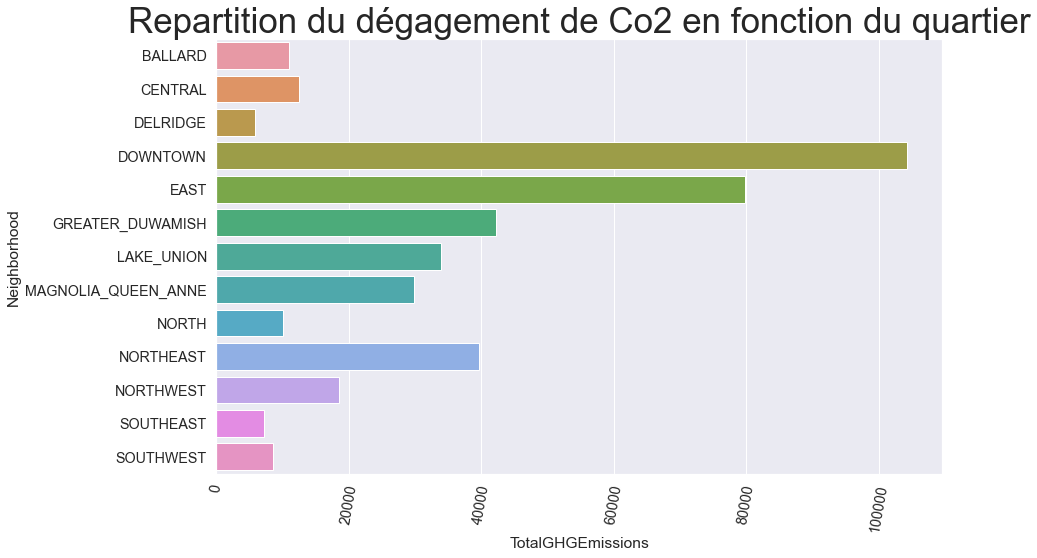

In [18]:
e_01 = data03["Neighborhood"]
e_01.replace("MAGNOLIA / QUEEN ANNE","MAGNOLIA_QUEEN_ANNE", inplace=True)
e_01.replace("LAKE UNION","LAKE_UNION", inplace=True)
e_01.replace("GREATER DUWAMISH","GREATER_DUWAMISH", inplace=True)
e_01.replace("Ballard","BALLARD", inplace=True)
e_01.replace("Central","CENTRAL", inplace=True)
e_01.replace("Delridge","DELRIDGE", inplace=True)
e_01.replace("DELRIDGE NEIGHBORHOODS","DELRIDGE", inplace=True)
e_01.replace("Northwest","NORTHWEST", inplace=True)
e_01.replace("North","NORTH", inplace=True)


e_02 = data03["TotalGHGEmissions"]

e_03 = pd.concat([e_01, e_02], axis=1, join="inner")
e_04 = e_03.groupby('Neighborhood').sum()
e_04.reset_index()
e_05 = pd.DataFrame(data=e_04)
e_05 = e_05.reset_index()

plt.figure(figsize=(13, 8))
sns.set(font_scale=1.3)
ax = sns.barplot(x='TotalGHGEmissions', y="Neighborhood", data=e_05, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_7.png')
plt.title("Repartition du dégagement de Co2 en fonction du quartier", fontsize=35)


Text(0.5, 1.0, "Repartition de la consommation d'éléctricité en fonction du quartier")

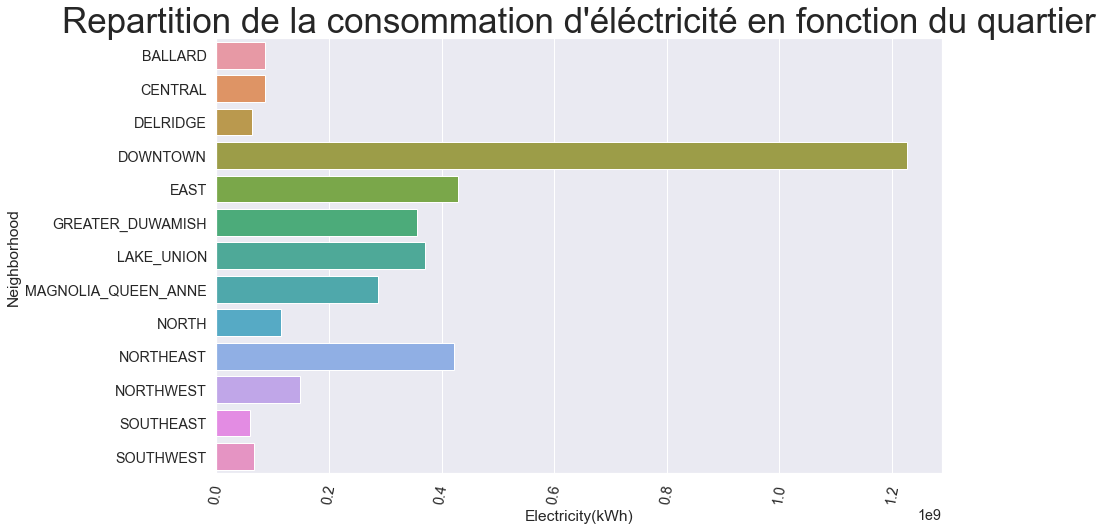

In [19]:
e_01 = data03["Neighborhood"]
e_02 = data03["Electricity(kWh)"]

e_03 = pd.concat([e_01, e_02], axis=1, join="inner")
e_04 = e_03.groupby('Neighborhood').sum()
e_04.reset_index()
e_05 = pd.DataFrame(data=e_04)
e_05 = e_05.reset_index()

plt.figure(figsize=(13, 8))
sns.set(font_scale=1.3)
ax = sns.barplot(x='Electricity(kWh)', y="Neighborhood", data=e_05, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_8.png')
plt.title("Repartition de la consommation d'éléctricité en fonction du quartier", fontsize=35)

Text(0.5, 1.0, "Repartition du dégagement de Co2 en fonction du Type d'immeuble")

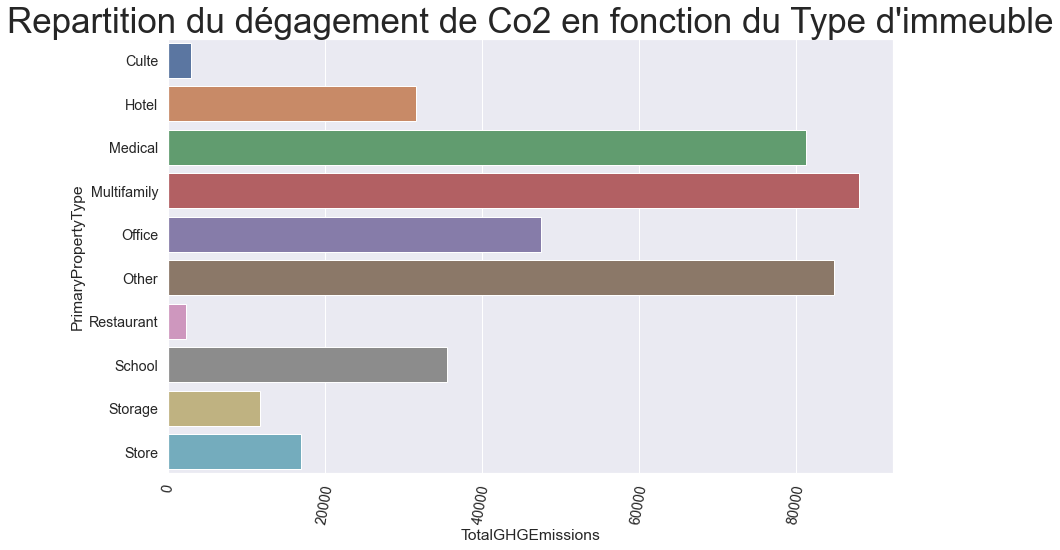

In [20]:
d3 = data03["PrimaryPropertyType"]
d3.replace("Hotel","Hotel", inplace=True)
d3.replace("Other","Other", inplace=True)
d3.replace("Mid-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Mixed Use Property","Other", inplace=True)
d3.replace("K-12 School","School", inplace=True)
d3.replace("University","School", inplace=True)
d3.replace("Small- and Mid-Sized Office","Office", inplace=True)
d3.replace("Self-Storage Facility","Storage", inplace=True)
d3.replace("Warehouse","Storage", inplace=True)
d3.replace("Large Office","Office", inplace=True)
d3.replace("Low-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Retail Store","Store", inplace=True)
d3.replace("Distribution Center","Storage", inplace=True)
d3.replace("Supermarket / Grocery Store","Store", inplace=True)
d3.replace("Refrigerated Warehouse","Storage", inplace=True)
d3.replace("High-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Senior Care Community","Medical", inplace=True)
d3.replace("Hospital","Medical", inplace=True)
d3.replace("Worship Facility","Lieux de culte", inplace=True)
d3.replace("Laboratory","Medical", inplace=True)
d3.replace("Non-Refrigerated Warehouse","Storage", inplace=True)
d3.replace("Restaurant","Restaurant", inplace=True)
d3.replace("Medical Office","Medical", inplace=True)
d3.replace("Residence Hall","Multifamily", inplace=True)
d3.replace("Restaurant\n","Restaurant", inplace=True)
d3.replace("Office","Office", inplace=True)

d4 = data03["TotalGHGEmissions"]

e_03 = pd.concat([d3, d4], axis=1, join="inner")
e_04 = e_03.groupby('PrimaryPropertyType').sum()
e_04.reset_index()
e_04 = e_04.rename(columns={"PrimaryPropertyType": 'PrimaryPropertyType',"TotalGHGEmissions": 'TotalGHGEmissions', })
e_05 = pd.DataFrame(data=e_04)
e_05 = e_05.reset_index()

plt.figure(figsize=(13, 8))
sns.set(font_scale=1.3)
ax = sns.barplot(x='TotalGHGEmissions', y="PrimaryPropertyType", data=e_05, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_9.png')
plt.title("Repartition du dégagement de Co2 en fonction du Type d'immeuble", fontsize=35)

Text(0.5, 1.0, " Repartition de la consommation d'éléctricité en fonction du type d'immeuble")

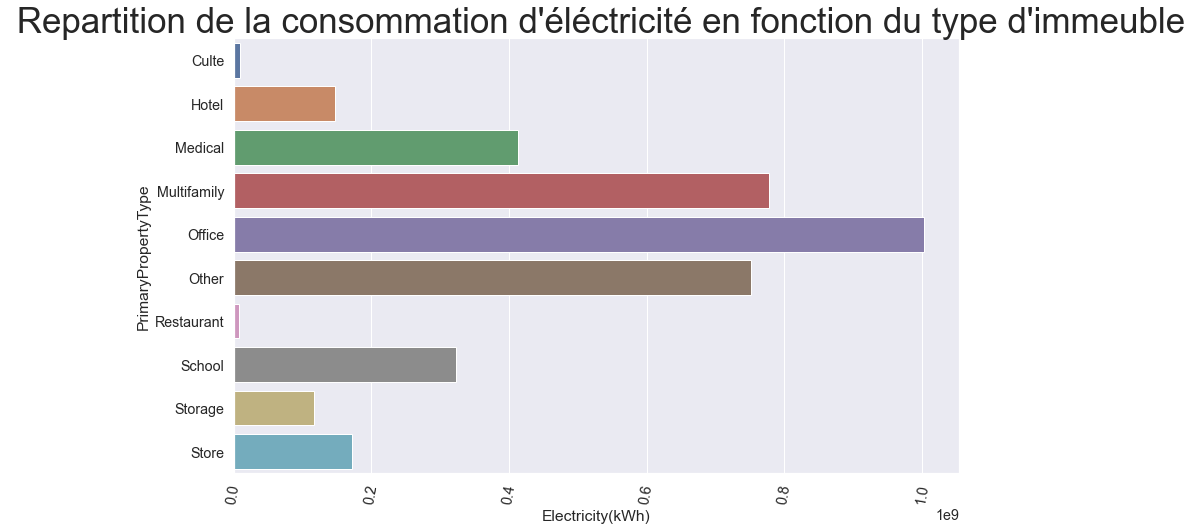

In [21]:
d3 = data03["PrimaryPropertyType"]
d3.replace("Hotel","Hotel", inplace=True)
d3.replace("Other","Other", inplace=True)
d3.replace("Mid-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Mixed Use Property","Other", inplace=True)
d3.replace("K-12 School","School", inplace=True)
d3.replace("University","School", inplace=True)
d3.replace("Small- and Mid-Sized Office","Office", inplace=True)
d3.replace("Self-Storage Facility","Storage", inplace=True)
d3.replace("Warehouse","Storage", inplace=True)
d3.replace("Large Office","Office", inplace=True)
d3.replace("Low-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Retail Store","Store", inplace=True)
d3.replace("Distribution Center","Storage", inplace=True)
d3.replace("Supermarket / Grocery Store","Store", inplace=True)
d3.replace("Refrigerated Warehouse","Storage", inplace=True)
d3.replace("High-Rise Multifamily","Multifamily", inplace=True)
d3.replace("Senior Care Community","Medical", inplace=True)
d3.replace("Hospital","Medical", inplace=True)
d3.replace("Worship Facility","Culte", inplace=True)
d3.replace("Laboratory","Medical", inplace=True)
d3.replace("Non-Refrigerated Warehouse","Storage", inplace=True)
d3.replace("Restaurant","Restaurant", inplace=True)
d3.replace("Medical Office","Medical", inplace=True)
d3.replace("Residence Hall","Multifamily", inplace=True)
d3.replace("Restaurant\n","Restaurant", inplace=True)
d3.replace("Office","Office", inplace=True)

d4 = data03["Electricity(kWh)"]

e_03 = pd.concat([d3, d4], axis=1, join="inner")
e_04 = e_03.groupby('PrimaryPropertyType').sum()
e_04.reset_index()
e_05 = pd.DataFrame(data=e_04)
e_05 = e_05.reset_index()


plt.figure(figsize=(13, 8))
sns.set(font_scale=1.3)
ax = sns.barplot(x='Electricity(kWh)', y="PrimaryPropertyType", data=e_05, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_10.png')
plt.title(" Repartition de la consommation d'éléctricité en fonction du type d'immeuble", fontsize=35)



Text(0.5, 1.0, "Taile des immeubles en fonction de l'année de construction")

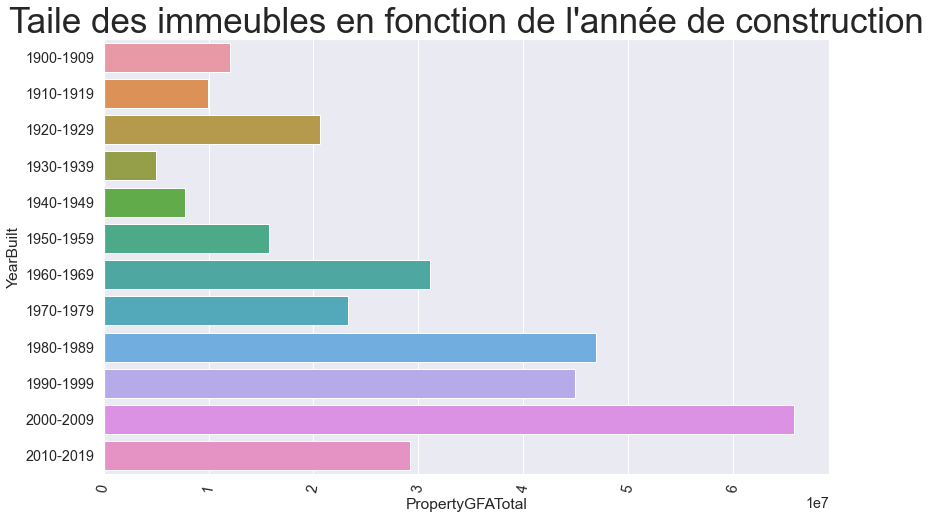

In [22]:
d4 = data03["YearBuilt"]
d41 = data03["PropertyGFATotal"]
d4 = pd.cut(d4, bins=[1900,
                      1910,
                      1920,
                      1930,
                      1940,
                      1950,
                      1960,
                      1970,
                      1980,
                      1990,
                      2000,
                      2010,
                      2020], 
            labels=["1900-1909",
                    "1910-1919",
                    "1920-1929",
                    "1930-1939",
                    "1940-1949",
                    "1950-1959",
                    "1960-1969",
                    "1970-1979",
                    "1980-1989",
                    "1990-1999",
                    "2000-2009",
                    "2010-2019"])

e_03 = pd.concat([d4, d41], axis=1, join="inner")
e_04 = e_03.groupby('YearBuilt').sum()
e_04 = e_04.reset_index()
e_05 = pd.DataFrame(data=e_04)
e_05 = e_05.reset_index()


plt.figure(figsize=(13, 8))
sns.set(font_scale=1.3)
ax = sns.barplot(x='PropertyGFATotal', y="YearBuilt", data=e_05, orient='h', saturation=0.7)
plt.xticks(rotation=80)
plt.savefig('Gene_11.png')
plt.title("Taile des immeubles en fonction de l'année de construction", fontsize=35)

In [23]:
d1 = data03["PropertyGFATotal"]
d1 = pd.DataFrame(data=d1)
d1.astype(int).describe()



,PropertyGFATotal
count,3.432000e+03
mean,9.458342e+04
std,2.176413e+05
min,1.128500e+04
25%,2.844600e+04
50%,4.409900e+04
75%,9.044875e+04
max,9.320156e+06


In [24]:
data03

,OSEBuildingID,DataYear,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,NaturalGas(kBtu),ComplianceStatus,Latitude,Longitude,Address,City,State,ZipCode,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1,12,...,1.27645e+06,Compliant,47.6122,-122.338,405 Olive way,Seattle,WA,98101,249.98,2.83
1,2,2016,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1,11,...,5.14508e+06,Compliant,47.6132,-122.334,724 Pine street,Seattle,WA,98101,295.86,2.86
2,3,2016,Hotel,5673-The Westin Seattle,0659000475,7,DOWNTOWN,1969,1,41,...,1.4938e+06,Compliant,47.6139,-122.338,1900 5th Avenue,Seattle,WA,98101,2089.28,2.19
3,5,2016,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,1926,1,10,...,1.81121e+06,Compliant,47.6141,-122.337,620 STEWART ST,Seattle,WA,98101,286.43,4.67
4,8,2016,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,1980,1,18,...,8.804e+06,Compliant,47.6138,-122.34,401 LENORA ST,Seattle,WA,98121,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,50222,2016,Office,Horticulture building,1624049080,2,GREATER_DUWAMISH,1990,1,1,...,325475,Error - Correct Default Data,47.5672,-122.312,1600 S Dakota St,Seattle,WA,NaN,20.94,1.7
3428,50223,2016,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1,1,...,553730,Compliant,47.5962,-122.323,719 8th Ave S,Seattle,WA,NaN,32.17,2.01
3429,50224,2016,Other,Queen Anne Pool,1794501150,7,MAGNOLIA_QUEEN_ANNE,1974,1,1,...,3.97374e+06,Compliant,47.6364,-122.358,1920 1st Ave W,Seattle,WA,NaN,223.54,16.99
3430,50225,2016,Other,South Park Community Center,7883603155,1,GREATER_DUWAMISH,1989,1,1,...,370601,Compliant,47.5283,-122.324,8319 8th Ave S,Seattle,WA,NaN,22.11,1.57


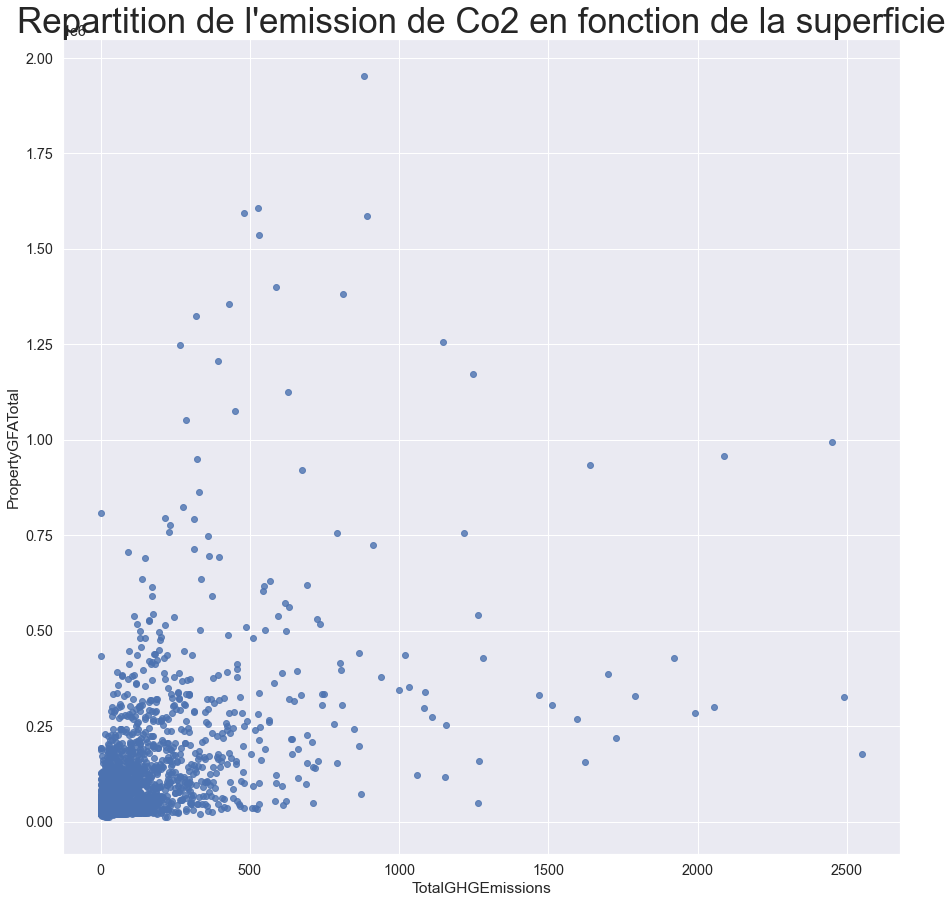

In [25]:
d3 = data03["TotalGHGEmissions"]
d3 = pd.DataFrame(data=d3)
d3 = d3.astype(str).astype(float)

d4 = data03["PropertyGFATotal"]
d4 = pd.DataFrame(data=d4)
d4 = d4.astype(str).astype(float)

d3 = d3.drop(d3[d3.TotalGHGEmissions > 2550].index)


e_03 = pd.concat([d3, d4], axis=1, join="inner")
e_04 = e_03.groupby('PropertyGFATotal').sum()
e_04.reset_index()
e_05 = pd.DataFrame(data=e_04)
e_05 = e_05.reset_index()

sns.regplot(x=e_05["TotalGHGEmissions"], y=e_05["PropertyGFATotal"], fit_reg=False)
plt.title("Repartition de l'emission de Co2 en fonction de la superficie", fontsize=35)
plt.savefig('Gene_12.png')
plt.show()


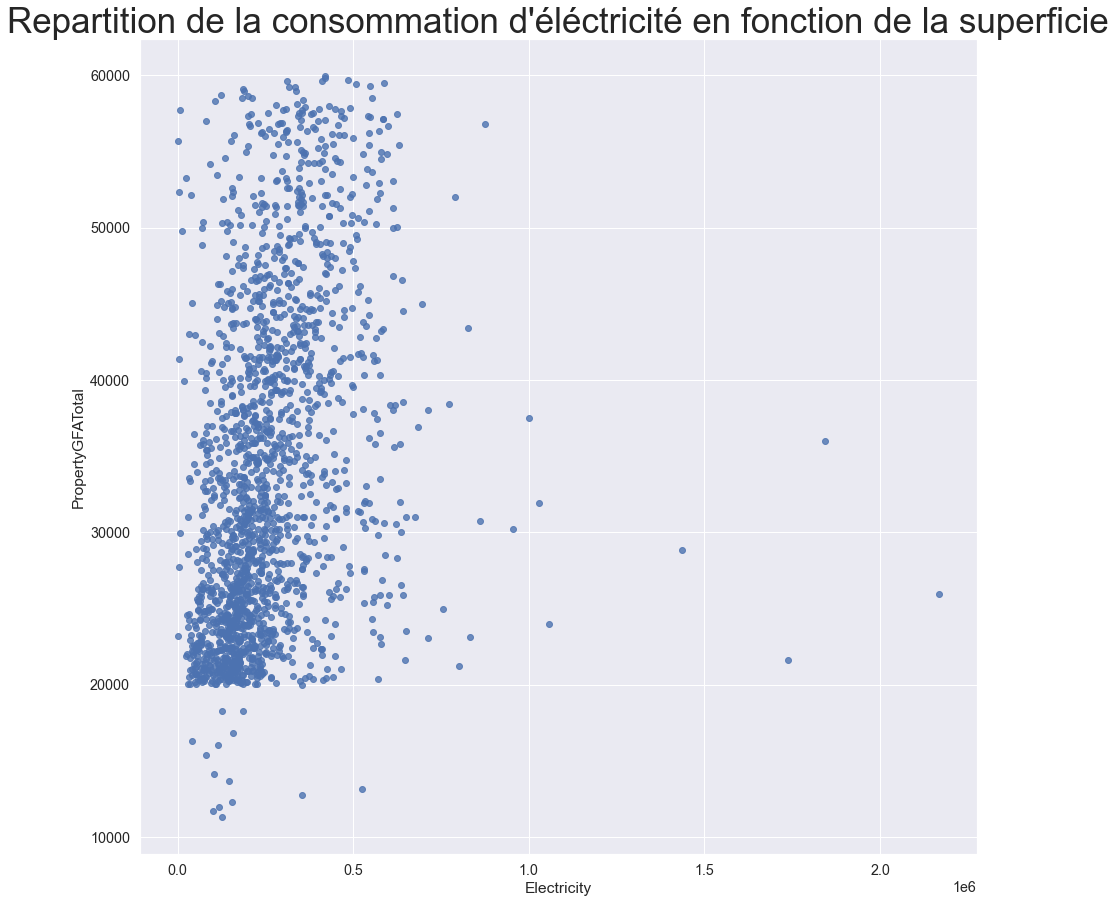

In [26]:
d3 = data03["Electricity(kWh)"]
d3 = pd.DataFrame(data=d3)
d3 = d3.dropna()
d3 = d3.astype(str).astype(float)
d31 = d3.rename(columns={"Electricity(kWh)": 'Electricity'})
d35 = d31[d31.Electricity < 650000]


d4 = data03["PropertyGFATotal"]
d4 = pd.DataFrame(data=d4)
d4 = d4.dropna()
d4 = d4.astype(str).astype(float)
d4 = d4[d4.PropertyGFATotal < 60000]

e_03 = pd.concat([d35, d4], axis=1, join="inner")
e_04 = e_03.groupby('PropertyGFATotal').sum()
e_04.reset_index()
e_05 = pd.DataFrame(data=e_04)
e_05 = e_05.reset_index()

sns.regplot(x=e_05["Electricity"], y=e_05["PropertyGFATotal"], fit_reg=False)
plt.title("Repartition de la consommation d'éléctricité en fonction de la superficie", fontsize=35)
plt.savefig('Gene_13.png')
plt.show()
